In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
from edog.tools import*
from edog.plot import*

filename = "params.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
k_id, w_id, patch_diameter = itemgetter("k_id", "w_id", "patch_diameter")(params["stimulus"])
A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])

wavenumber_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [2]:
for pd in patch_diameter:
    tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_ex), len(k_id)])
    
    for j, n in enumerate(nr):
        for k, d in enumerate(dr):
            wavenumber_id = ((2**j * (d/dr.min())) * k_id).astype(int)
            print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 2), 
                                                         round(np.pi/d), 2))
            
            for i, w in enumerate(w_rc_ex):
                network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                         A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                         w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                         w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                         w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex)

                angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
                wavenumber = network.integrator.spatial_angular_freqs[wavenumber_id]
                spatiotemporal_tuning = spatiotemporal_wavenumber_tuning(network=network,
                                                                         angular_freq=angular_freq,
                                                                         wavenumber=wavenumber,
                                                                         patch_diameter=pd)

                tuning_curve[j, k, i, :] = spatiotemporal_tuning[0, :]

    wavenumber_tuning["fb_ex"][float(pd.magnitude)] = tuning_curve

nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr=9.0, dr=0.2 deg, dk=0.06 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr

## Feedback inhibition

In [3]:
for pd in patch_diameter:
    tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_in), len(k_id)])   
    
    for j, n in enumerate(nr):
        for k, d in enumerate(dr):
            wavenumber_id = ((2**j * (d/dr.min())) * k_id).astype(int)
            print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 2), 
                                                         round(np.pi/d), 2))
            for i, w in enumerate(w_rc_in):
                network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                         A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                         w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                         w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                         w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in)

                angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
                wavenumber = network.integrator.spatial_angular_freqs[wavenumber_id]
                spatiotemporal_tuning = spatiotemporal_wavenumber_tuning(network=network,
                                                                         angular_freq=angular_freq,
                                                                         wavenumber=wavenumber,
                                                                         patch_diameter=pd)

                tuning_curve[j, k, i, :] = spatiotemporal_tuning[0, :]
        
    wavenumber_tuning["fb_in"][float(pd.magnitude)] = tuning_curve

nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr=9.0, dr=0.2 deg, dk=0.06 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr

## Mixed excitatory and inhibitory feedback

In [4]:
for pd in patch_diameter:
    tuning_curve = np.zeros([len(nr), len(dr), len(w_rc_mix), len(k_id)])
    
    for j, n in enumerate(nr):
        for k, d in enumerate(dr):
            wavenumber_id = ((2**j * (d/dr.min())) * k_id).astype(int)
            print("nr={}, dr={}, dk={}, k_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 2), 
                                                         round(np.pi/d), 2))
            
            for i, w in enumerate(w_rc_mix):
                network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=d,
                                         A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                         w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                         w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                         w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                         w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex)

                angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
                wavenumber = network.integrator.spatial_angular_freqs[wavenumber_id]
                spatiotemporal_tuning = spatiotemporal_wavenumber_tuning(network=network,
                                                                         angular_freq=angular_freq,
                                                                         wavenumber=wavenumber,
                                                                         patch_diameter=pd)

                tuning_curve[j, k, i, :] = spatiotemporal_tuning[0, :]


    wavenumber_tuning["fb_mix"][float(pd.magnitude)] = tuning_curve

nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr=6.0, dr=0.2 deg, dk=0.49 1/deg, k_max=16.0 1/deg
nr=7.0, dr=0.05 deg, dk=0.98 1/deg, k_max=63.0 1/deg
nr=7.0, dr=0.1 deg, dk=0.49 1/deg, k_max=31.0 1/deg
nr=7.0, dr=0.15 deg, dk=0.33 1/deg, k_max=21.0 1/deg
nr=7.0, dr=0.2 deg, dk=0.25 1/deg, k_max=16.0 1/deg
nr=8.0, dr=0.05 deg, dk=0.49 1/deg, k_max=63.0 1/deg
nr=8.0, dr=0.1 deg, dk=0.25 1/deg, k_max=31.0 1/deg
nr=8.0, dr=0.15 deg, dk=0.16 1/deg, k_max=21.0 1/deg
nr=8.0, dr=0.2 deg, dk=0.12 1/deg, k_max=16.0 1/deg
nr=9.0, dr=0.05 deg, dk=0.25 1/deg, k_max=63.0 1/deg
nr=9.0, dr=0.1 deg, dk=0.12 1/deg, k_max=31.0 1/deg
nr=9.0, dr=0.15 deg, dk=0.08 1/deg, k_max=21.0 1/deg
nr=9.0, dr=0.2 deg, dk=0.06 1/deg, k_max=16.0 1/deg
nr=6.0, dr=0.05 deg, dk=1.96 1/deg, k_max=63.0 1/deg
nr=6.0, dr=0.1 deg, dk=0.98 1/deg, k_max=31.0 1/deg
nr=6.0, dr=0.15 deg, dk=0.65 1/deg, k_max=21.0 1/deg
nr

-------------
## Convergence plots

<IPython.core.display.Javascript object>


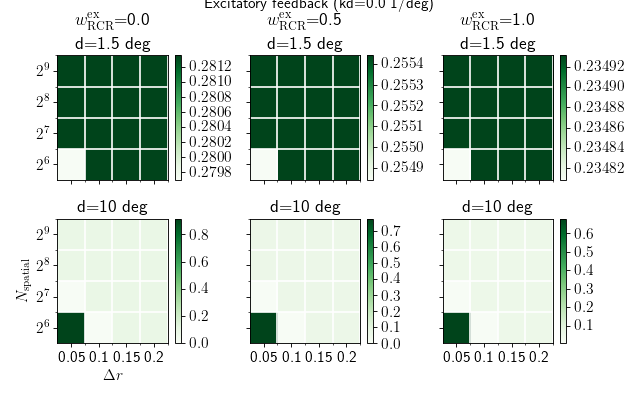

<IPython.core.display.Javascript object>


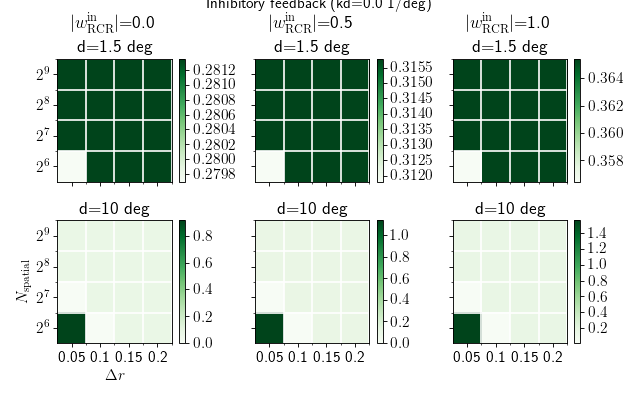

<IPython.core.display.Javascript object>


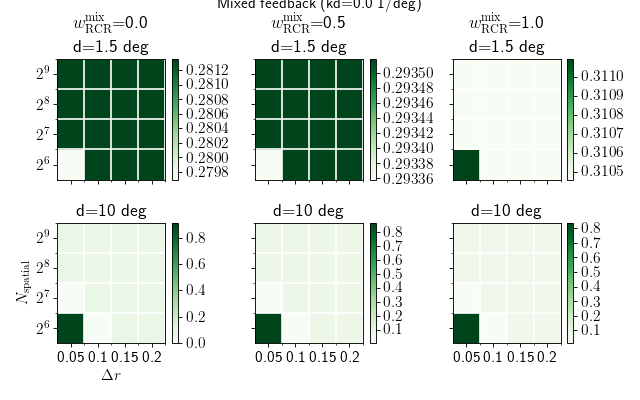

<IPython.core.display.Javascript object>


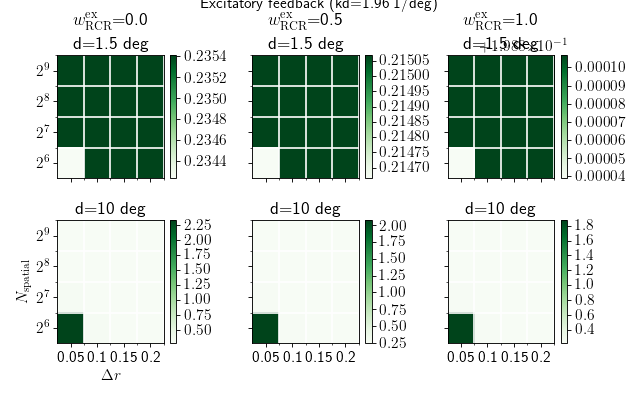

<IPython.core.display.Javascript object>


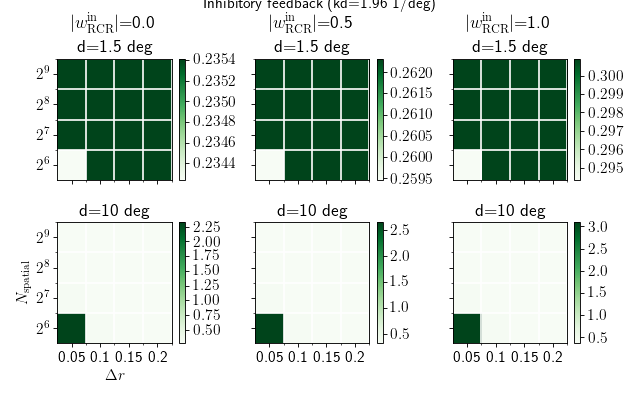

<IPython.core.display.Javascript object>


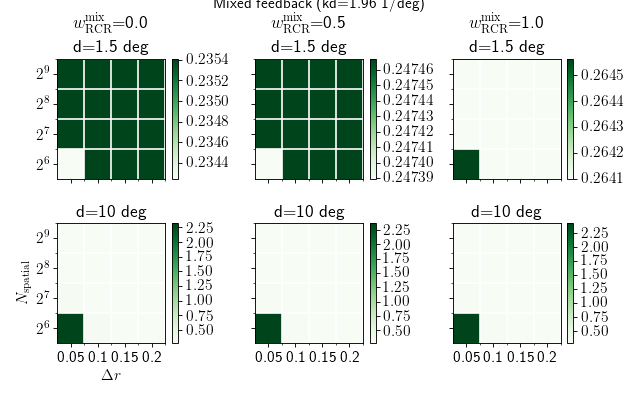

<IPython.core.display.Javascript object>


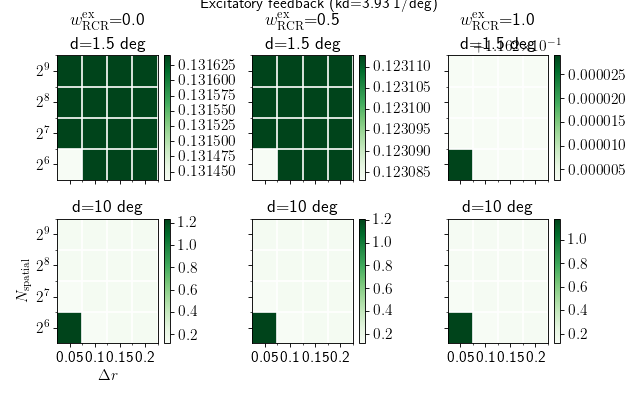

<IPython.core.display.Javascript object>


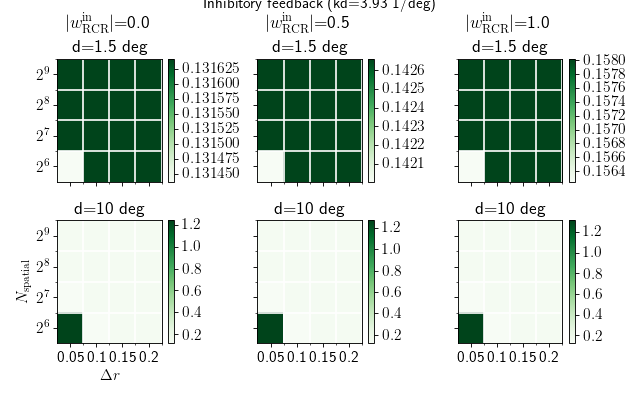

<IPython.core.display.Javascript object>


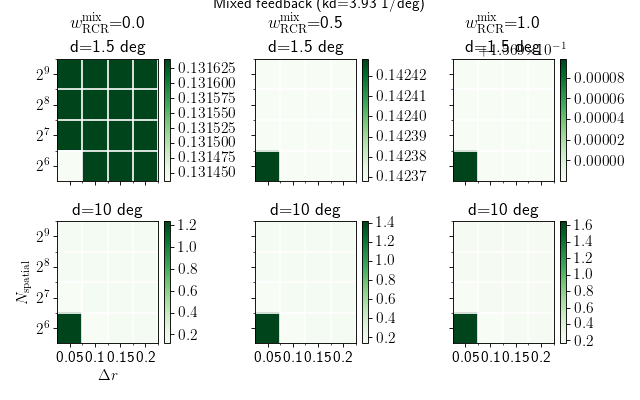

<IPython.core.display.Javascript object>


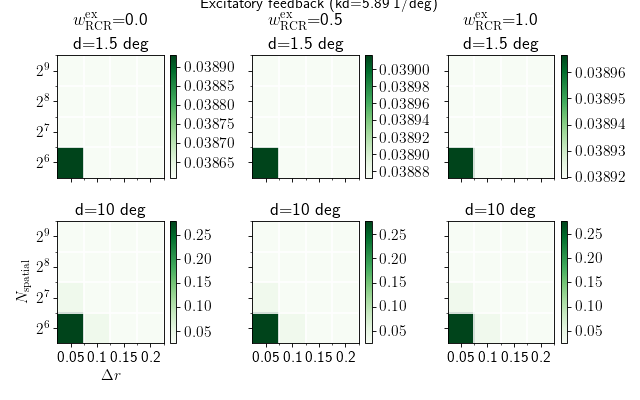

<IPython.core.display.Javascript object>


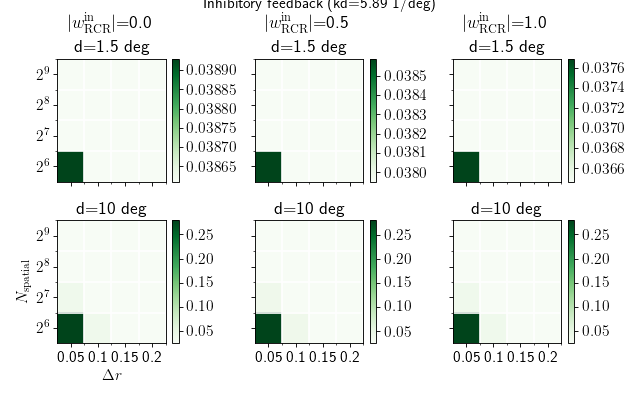

<IPython.core.display.Javascript object>


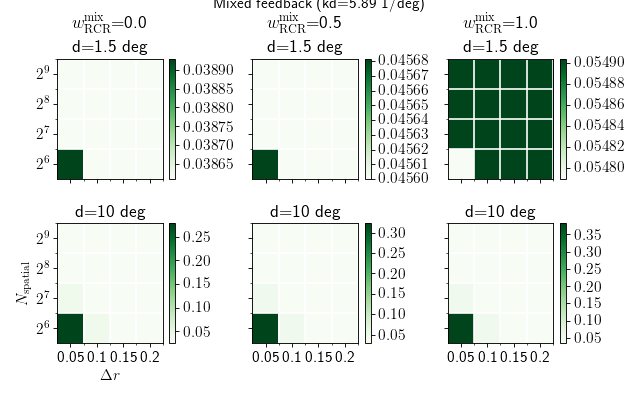

<IPython.core.display.Javascript object>


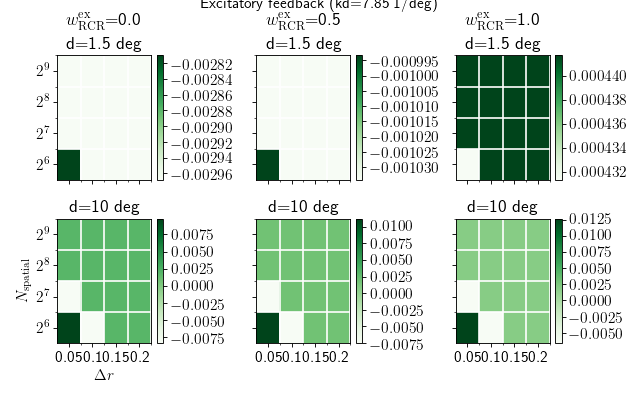

<IPython.core.display.Javascript object>


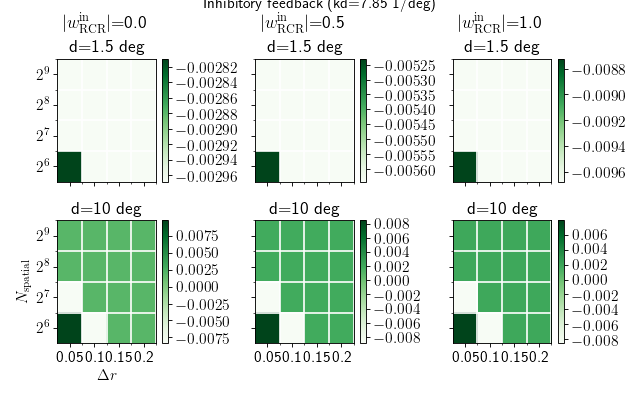

<IPython.core.display.Javascript object>


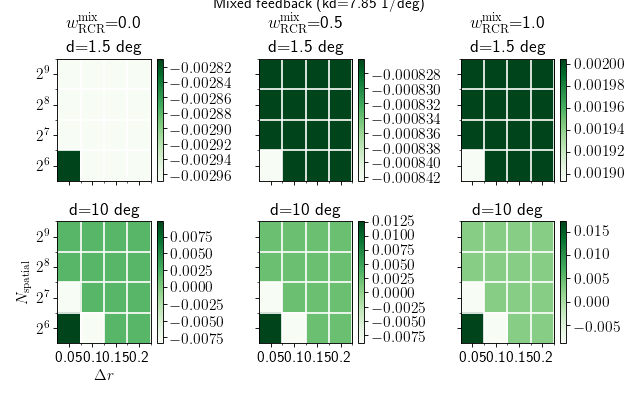

<IPython.core.display.Javascript object>


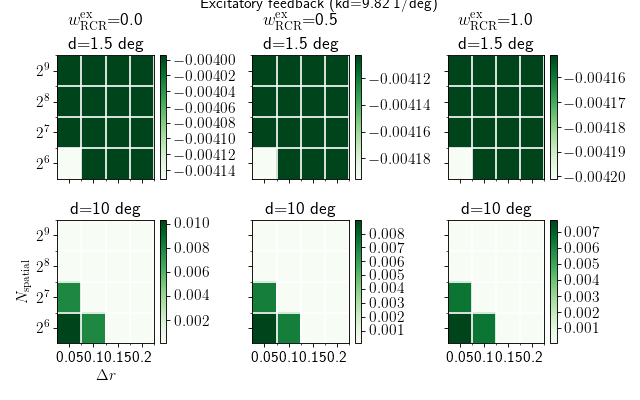

<IPython.core.display.Javascript object>


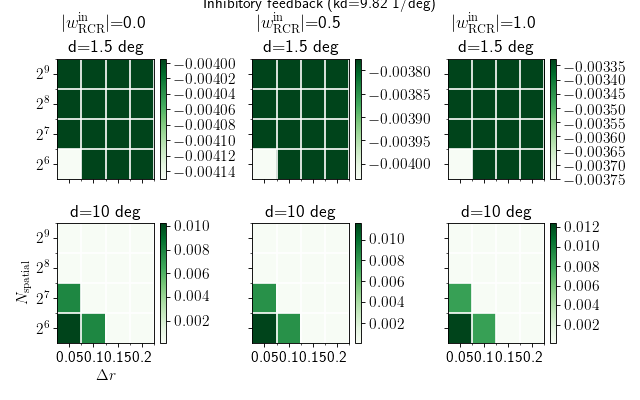

<IPython.core.display.Javascript object>


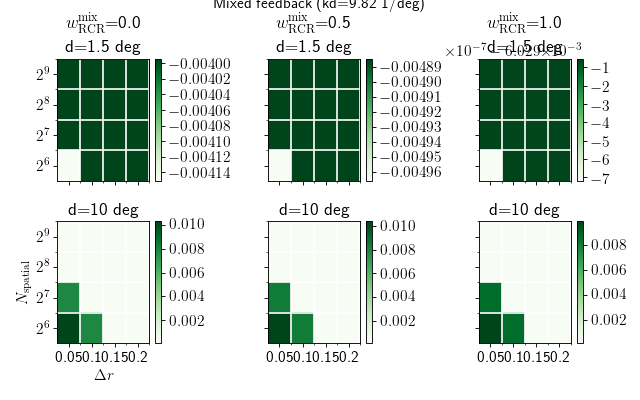

In [6]:
def map_wavenumber(tuning, j, nr, dr):
    k_id = 1
    print(dr/dr.min())
    res = np.zeros([len(nr), len(dr)])
    map_nr = (k_id * 2**(nr - nr.min())).astype(int)
    map_dr = (k_id * 2**(dr/dr.min()-1).magnitude).astype(int)

    print(map_dr, map_nr, tuning.shape)
    for m, map_m in enumerate(map_nr):
        for n, map_n in enumerate(map_dr):
            res[m, n] = tuning[m, map_n, j, map_m]
        
    return res


locs_dr = np.arange(0.0, len(dr))
locs_nr = np.arange(0.0, len(nr))
cmap = "Greens"

titles = ["Excitatory feedback", 
          "Inhibitory feedback", 
          "Mixed feedback"]

labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", 
          r"$|w^\mathrm{in}_{\mathrm{RCR}}|$", 
          r"$w^\mathrm{mix}_{\mathrm{RCR}}$"]

for m, kd in enumerate(wavenumber):
    for i, (key, w_rc) in enumerate(zip(wavenumber_tuning.keys(), [w_rc_ex, w_rc_in, w_rc_mix])):
        fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex="col", sharey="row")
        plt.figtext(0.5, 0.99, "{} (kd={})".format(titles[i], round(kd, 2)),
                                                   va="center", ha="center")

        for j, w in enumerate(w_rc):
            ax[0, j].set_title(labels[i]+"={} \n d=1.5 deg".format(w))        
            tuning = wavenumber_tuning[key][1.5][:, :, j, m]
            cax = ax[0, j].imshow(tuning, aspect="auto", origin="lower", cmap=cmap)
            fig.colorbar(cax, ax=ax[0, j])



            tuning = wavenumber_tuning[key][10][:, :, j, m] 
            cax = ax[1, j].imshow(tuning, aspect="auto", origin="lower", cmap=cmap)
            ax[1, j].set_title("d=10 deg")        
            fig.colorbar(cax, ax=ax[1, j])

            for ax1, ax2 in zip([ax[0, j].xaxis, ax[1, j].xaxis], 
                                [ax[0, j].yaxis, ax[1, j].yaxis]):
                ax1.set_ticks(locs_dr + 0.5, minor=True)
                ax1.set(ticks=locs_dr, ticklabels=dr.magnitude)

                ax2.set_ticks(locs_nr + 0.5, minor=True)
                ax2.set(ticks=locs_nr, ticklabels=[r"$2^{}$".format(int(n)) for n in nr])

            ax[0, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)
            ax[1, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)

        ax[1, 0].set_ylabel(r"$N_\mathrm{spatial}$")
        ax[1, 0].set_xlabel(r"$\Delta r$") 
        fig.tight_layout()


    fig.tight_layout()